from IPython.display import HTML

HTML("""
<div style="background-color: rgb(0, 150, 250); text-align: center;">
  <h2 style="margin: auto; padding: 20px; color: #ffffff;">
    PRÉTRAITEMENT ET ANALYSE DES ACCIDENTS ROUTIERS AU NIGERIA
  </h2>
</div>
""")

- Importer les bibliotheques que l'on a besoin pour le pretraitement et nettoyage 

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [12]:
# charger le dataset
df = pd.read_csv("Accidents_Addis-Abeba.csv", sep=',')
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


<div style= "border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Gestion et Nettoyage des donnees</h3>
</div>

In [14]:
# Afficher le nombre de valeur manquantes

val_manq = df.isnull().sum()/df.shape[0]
val_manq.sort_values(ascending = False)

Defect_of_vehicle              0.353
Service_year_of_vehicle        0.304
Work_of_casuality              0.262
Fitness_of_casuality           0.206
Type_of_vehicle                0.073
Driving_experience             0.065
Educational_level              0.058
Owner_of_vehicle               0.038
Lanes_or_Medians               0.030
Vehicle_driver_relation        0.029
Area_accident_occured          0.019
Road_surface_type              0.012
Road_allignment                0.009
Type_of_collision              0.005
Casualty_severity              0.000
Age_band_of_casualty           0.000
Sex_of_casualty                0.000
Time                           0.000
Vehicle_movement               0.000
Pedestrian_movement            0.000
Cause_of_accident              0.000
Casualty_class                 0.000
Road_surface_conditions        0.000
Number_of_casualties           0.000
Number_of_vehicles_involved    0.000
Weather_conditions             0.000
Light_conditions               0.000
D

- ici, on va supprimer tous les colonnes qui on un taux superieur a 0.077, sinon cela affectera notre analyse

In [16]:
# supprime les colonnes
seuil = 0.075
supp_colonnes = val_manq[val_manq > seuil].index
df = df.drop(columns=supp_colonnes)

In [17]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured',
       'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Imputation

In [19]:
# on separe les variable numerique et les variables categorielle

df_num = df.select_dtypes(include = [int, float, bool])
num_col = df_num.columns
df_num.head()

,Number_of_vehicles_involved,Number_of_casualties
0,2,2
1,2,2
2,2,2
3,2,2
4,2,2


In [20]:
df_cat = df.select_dtypes(exclude = [int, float, bool])
cat_col = df_cat.columns
df_cat.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,...,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Residential areas,...,Normal,Collision with roadside-parked vehicles,Going straight,na,na,na,na,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,Office areas,...,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Recreational areas,...,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Office areas,...,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,Industrial areas,...,Normal,Vehicle with vehicle collision,Going straight,na,na,na,na,Not a Pedestrian,Overtaking,Slight Injury


### On fait l'imputation: pour les variables numeriques on remplace les valeurs manquantes par la moyenne et les variables categorielles par le mode

In [22]:
# variable numerique
imputer_num = SimpleImputer()
df_num = pd.DataFrame(imputer_num.fit_transform(df_num), columns = num_col)


In [23]:
imputer_cat = SimpleImputer(strategy = 'most_frequent')
df_cat = pd.DataFrame(imputer_cat.fit_transform(df_cat), columns = cat_col)

In [24]:
# On assemble les variable
df1 = pd.concat([df_num, df_cat], axis = 1)

In [25]:
# Verification

val_manq = df1.isnull().sum()/df1.shape[0]
val_manq.sort_values(ascending = False)

Number_of_vehicles_involved    0.0
Number_of_casualties           0.0
Cause_of_accident              0.0
Pedestrian_movement            0.0
Casualty_severity              0.0
Age_band_of_casualty           0.0
Sex_of_casualty                0.0
Casualty_class                 0.0
Vehicle_movement               0.0
Type_of_collision              0.0
Weather_conditions             0.0
Light_conditions               0.0
Road_surface_conditions        0.0
Road_surface_type              0.0
Types_of_Junction              0.0
Road_allignment                0.0
Lanes_or_Medians               0.0
Area_accident_occured          0.0
Owner_of_vehicle               0.0
Type_of_vehicle                0.0
Driving_experience             0.0
Vehicle_driver_relation        0.0
Educational_level              0.0
Sex_of_driver                  0.0
Age_band_of_driver             0.0
Day_of_week                    0.0
Time                           0.0
Accident_severity              0.0
dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         1000 non-null   object
 1   Day_of_week                  1000 non-null   object
 2   Age_band_of_driver           1000 non-null   object
 3   Sex_of_driver                1000 non-null   object
 4   Educational_level            942 non-null    object
 5   Vehicle_driver_relation      971 non-null    object
 6   Driving_experience           935 non-null    object
 7   Type_of_vehicle              927 non-null    object
 8   Owner_of_vehicle             962 non-null    object
 9   Area_accident_occured        981 non-null    object
 10  Lanes_or_Medians             970 non-null    object
 11  Road_allignment              991 non-null    object
 12  Types_of_Junction            1000 non-null   object
 13  Road_surface_type            988 n

<div style= "border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Analyse Statistique</h3>
</div>

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,1000.0,2.079,0.742503,1.0,2.0,2.0,2.0,6.0
Number_of_casualties,1000.0,1.703,1.082572,1.0,1.0,1.0,2.0,6.0


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Comprehensions et Etudes des donnees</h2>
</div>

In [30]:
# import des libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg, count, max, min, sum, format_number, desc, when

# Création de la session Spark
spark = SparkSession.builder.appName("Memoire").getOrCreate()

In [31]:
# Traduction en francais

Number_of_vehicles_involved	   Nombre_de_vehicules_impliques
Number_of_casualties	       Nombre_de_victimes
Time	                       Heure
Day_of_week	                   Jour_de_la_semaine
Age_band_of_driver	           Tranche_d_age_du_conducteur
Sex_of_driver	               Sexe_du_conducteur
Educational_level	           Niveau_d_etudes
Vehicle_driver_relation	       Relation_conducteur_vehicule
Driving_experience	           Experience_de_conduite
Type_of_vehicle	               Type_de_vehicule
Owner_of_vehicle	           Proprietaire_du_vehicule
Area_accident_occured	       Lieu_de_l_accident
Lanes_or_Medians	           Voies_ou_Medianes
Road_allignment	               Alignement_de_la_route
Types_of_Junction	           Types_d_Intersection
Road_surface_type	           Type_de_surface_de_la_route
Road_surface_conditions	       Etat_de_la_surface_de_la_route
Light_conditions	           Conditions_de_luminosite
Weather_conditions	           Conditions_meteo
Type_of_collision	           Type_de_collision
Vehicle_movement	           Mouvement_du_vehicule
Casualty_class	               Classe_de_victime
Sex_of_casualty	               Sexe_de_la_victime
Age_band_of_casualty	       Tranche_d_age_de_la_victime
Casualty_severity	           Gravite_de_la_blessure
Pedestrian_movement	           Mouvement_du_pieton
Cause_of_accident	           Cause_de_l_accident
Accident_severity	           Gravite_de_l_accident

SyntaxError: invalid syntax (3609869165.py, line 3)

In [54]:
print("Les causes principaux d'accidents : \n" )
causes_princ = df['Cause_of_accident'].value_counts().head(5)
causes_princ

Les causes principaux d'accidents : 



Cause_of_accident
No distancing                 186
Changing lane to the right    155
Driving carelessly            117
Changing lane to the left     114
No priority to vehicle         97
Name: count, dtype: int64

In [78]:
gravite = df.groupby("Accident_severity").size()

# Afficher les résultats
print("Nombre d'accidents par gravité : \n")
print(gravite)

Nombre d'accidents par gravité : 

Accident_severity
Fatal injury       20
Serious Injury    181
Slight Injury     799
dtype: int64


In [72]:
# Compter le nombre d'accidents par jour de la semaine
accidents_par_jour = df.groupby("Day_of_week").size().reset_index(name='Nombre_d_accidents')

# Afficher les résultats
print("Nombre d'accidents par jour de la semaine : \n")
print(accidents_par_jour)

Nombre d'accidents par jour de la semaine : 

  Day_of_week  Nombre_d_accidents
0      Friday                 187
1      Monday                 134
2    Saturday                 129
3      Sunday                 136
4    Thursday                 138
5     Tuesday                 133
6   Wednesday                 143


In [74]:
# Compter le nombre d'accidents par condition météo
accidents_par_meteo = df.groupby("Weather_conditions").size().reset_index(name='Nombre_d_accidents')

print("Nombre d'accidents par condition météo :")
print(accidents_par_meteo)

Nombre d'accidents par condition météo :
  Weather_conditions  Nombre_d_accidents
0             Cloudy                  19
1        Fog or mist                   2
2             Normal                 769
3              Other                  22
4            Raining                 141
5  Raining and Windy                   6
6               Snow                  14
7            Unknown                   8
8              Windy                  19


In [76]:
# Compter le nombre d'accidents par lieu et prendre les 5 premiers
lieux_plus_frequents = df['Area_accident_occured'].value_counts().head(5)

print("Les 5 lieux d'accident les plus fréquents : \n")
print(lieux_plus_frequents)


Les 5 lieux d'accident les plus fréquents : 

Area_accident_occured
Other                320
Office areas         279
Residential areas    167
 Church areas         84
School areas          38
Name: count, dtype: int64


In [104]:
# ages des conducteurs impliquer dans des accidents
ages = df['Age_band_of_driver'].value_counts().head(5)

print(" L'age des conducteurs impliqués dans un accident : \n")
print(ages)

 L'age des conducteurs impliqués dans un accident : 

Age_band_of_driver
18-30       380
31-50       339
Over 51     162
Under 18     67
Unknown      52
Name: count, dtype: int64


In [108]:
table_victimes = pd.crosstab(df['Age_band_of_casualty'], df['Casualty_severity'])

print("Répartition des victimes par tranche d'âge et gravité des blessures : \n")
print(table_victimes)

Répartition des victimes par tranche d'âge et gravité des blessures : 

Casualty_severity     1   2    3   na
Age_band_of_casualty                 
18-30                 0  35  201    0
31-50                 0  17  165    0
Over 51               4  17   74    0
Under 18              1  21  115    0
na                    0   0    0  350


- ici le 1 designe les accidents fatale (morts), le 2 les accidents avec de serieux consequences et le 3 les accidents pas tres grave

<div style="background-color: orange;" >
<h2 style="margin: auto; padding: 20px; color:#fff; text-align: center ">Visualisations</h2>
</div>

### carte de densite des areas avec le plus d'accidents

C:\Users\pc\AppData\Local\Temp\ipykernel_14372\4292893884.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Area_accident_occured', order=df['Area_accident_occured'].value_counts().head(10).index, palette='magma')


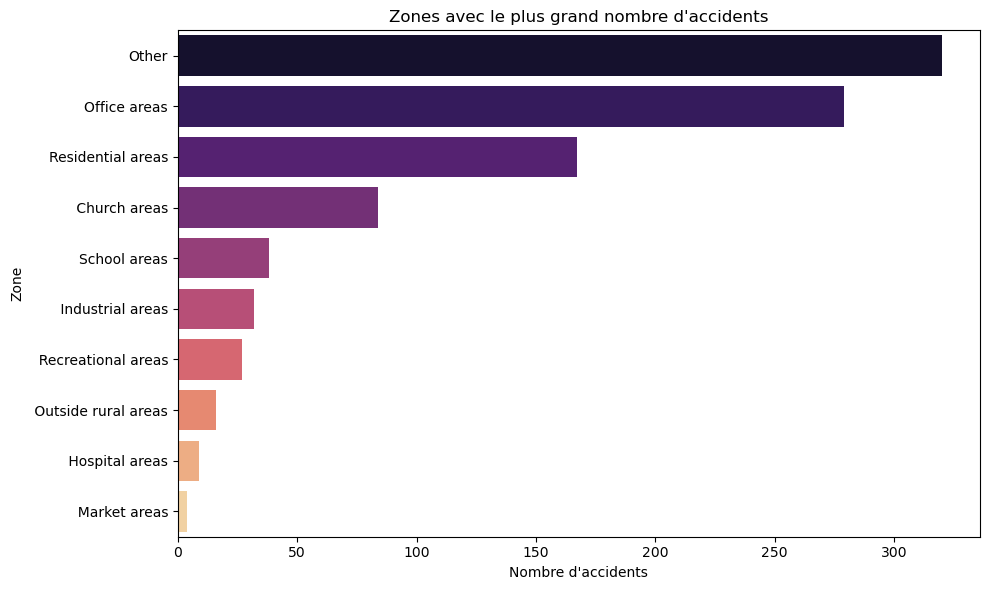

In [117]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Area_accident_occured', order=df['Area_accident_occured'].value_counts().head(10).index, palette='magma')
plt.title("Zones avec le plus grand nombre d'accidents")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Zone")
plt.tight_layout()
plt.show()

### Nuages de point age vs experience du conducteur

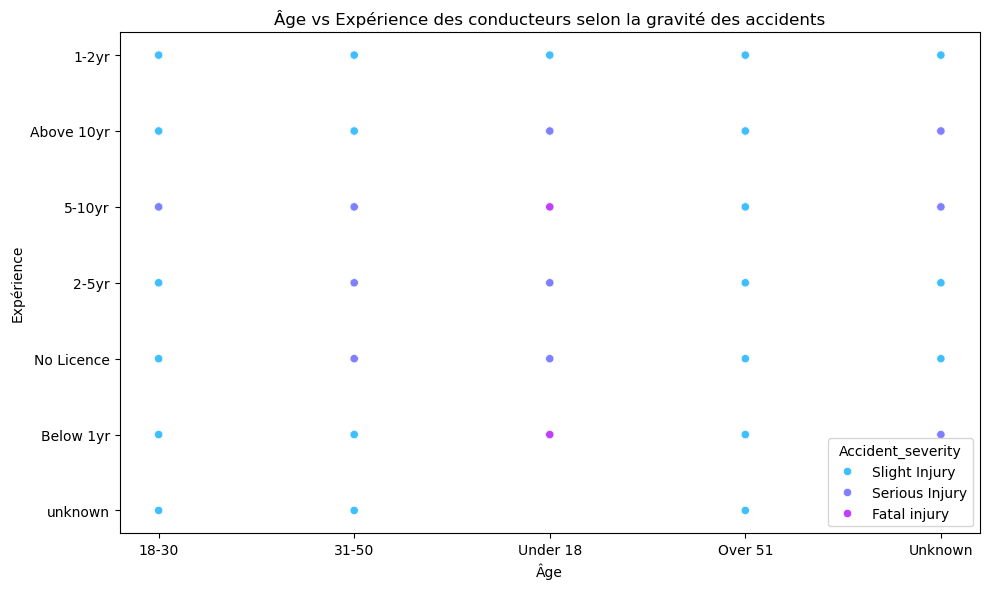

In [123]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Age_band_of_driver', y='Driving_experience', hue='Accident_severity', palette='cool')
plt.title("Âge vs Expérience des conducteurs selon la gravité des accidents")
plt.xlabel("Âge")
plt.ylabel("Expérience")
plt.tight_layout()
plt.show()

### Diagramme en barre des accidents par heure de la journee 

C:\Users\pc\AppData\Local\Temp\ipykernel_14372\1504327957.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour


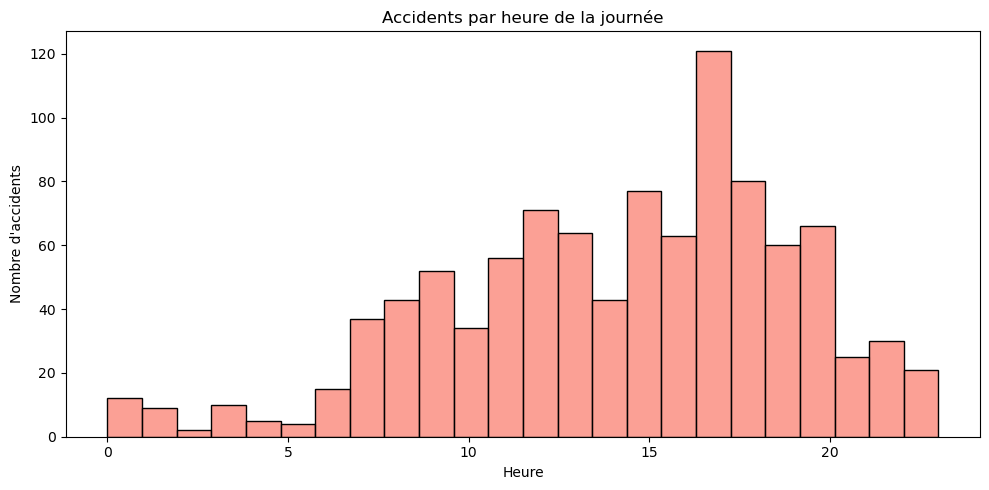

In [128]:
df['Hour'] = pd.to_datetime(df['Time'], errors='coerce').dt.hour

plt.figure(figsize=(10,5))
sns.histplot(df['Hour'].dropna(), bins=24, kde=False, color='salmon')
plt.title("Accidents par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Nombre d'accidents")
plt.tight_layout()
plt.show()

### Nombres d'accidents causer par les types de voiture

C:\Users\pc\AppData\Local\Temp\ipykernel_14372\3490641314.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type_of_vehicle', order=df['Type_of_vehicle'].value_counts().head(10).index, palette='cool')


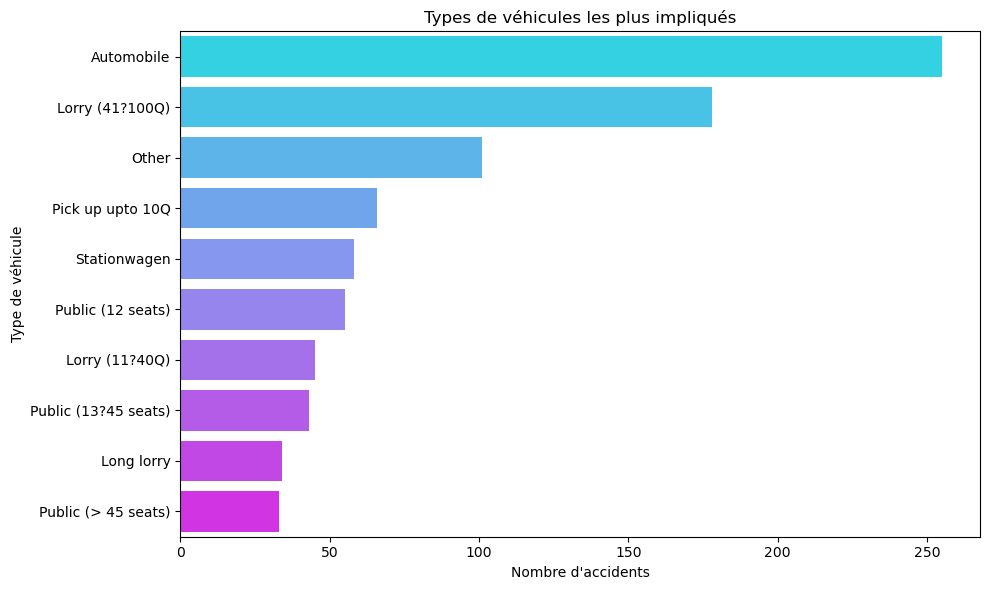

In [133]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Type_of_vehicle', order=df['Type_of_vehicle'].value_counts().head(10).index, palette='cool')
plt.title("Types de véhicules les plus impliqués")
plt.xlabel("Nombre d'accidents")
plt.ylabel("Type de véhicule")
plt.tight_layout()
plt.show()

### Boxplot

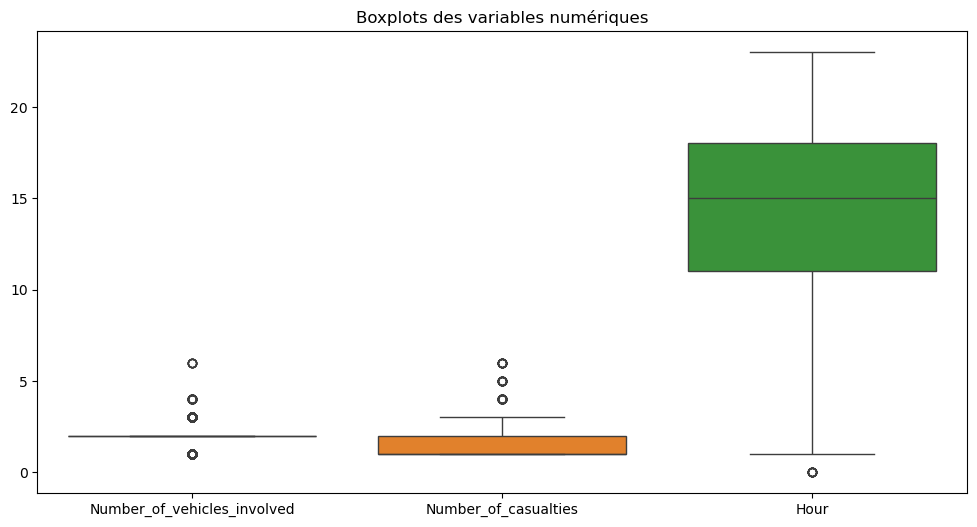

In [148]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplots des variables numériques')
plt.show()